
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [5]:
# Yor code here to complete the Linear Interpolation Function
def lin(y0, y1, x0, x1, x):
    return y0 + (y1 - y0) * ((x - x0) / (x1 - x0))
print(lin(3,12,1,4,2.5))


7.5



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [26]:

import numpy as np

def forward(f, x, h):
    return (f(x + h) - f(x)) / h

#backward
def backward(f, x, h):
    return (f(x) - f(x - h)) / h

#central
def central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

print("Forward Difference:", forward(np.sin, np.pi/4, 0.00001))
print("Backward Difference:", backward(np.sin, np.pi/4, 0.000001))
print("Central Difference:", central(np.sin, np.pi/4, 0.0000001))


Forward Difference: 0.7071032456340552
Backward Difference: 0.7071071348452307
Central Difference: 0.7071067803510189



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

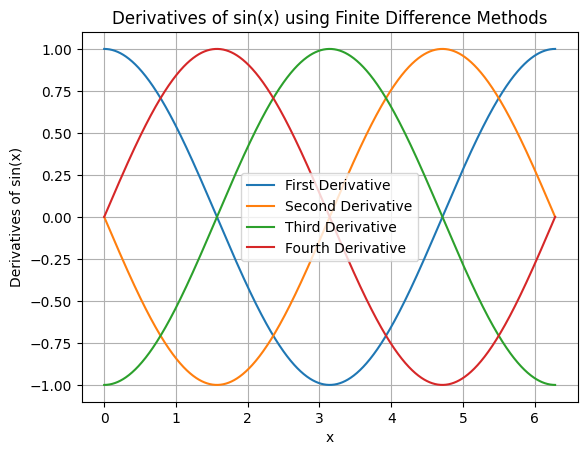

In [5]:
#Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 
import numpy as np
def first(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)
def second(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)
def third(f, x, h):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h)) / (2 * h ** 3)
def fourth(f, x, h):
    return (f(x + 2*h) - 4*f(x + h) + 6*f(x) - 4*f(x - h) + f(x - 2*h)) / (h**4)

import matplotlib.pyplot as plt
x = np.linspace(0, 2 * np.pi, 1000)
h = 0.01
plt.plot(x, first(np.sin, x, h), label='First Derivative')
plt.plot(x, second(np.sin, x, h), label='Second Derivative')
plt.plot(x, third(np.sin, x, h), label='Third Derivative')
plt.plot(x, fourth(np.sin, x, h), label='Fourth Derivative')
plt.legend()
plt.xlabel('x')
plt.ylabel('Derivatives of sin(x)')
plt.title('Derivatives of sin(x) using Finite Difference Methods')
plt.grid()


### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

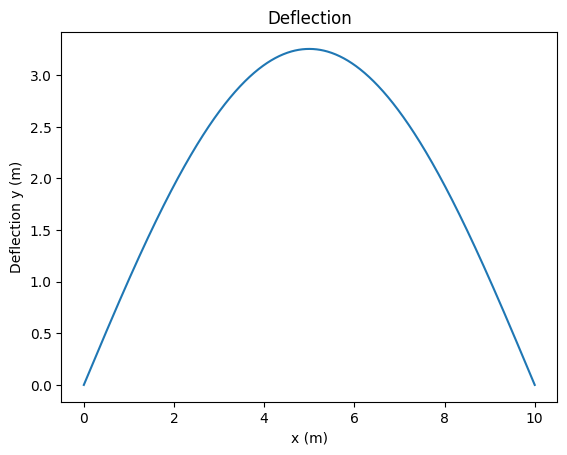

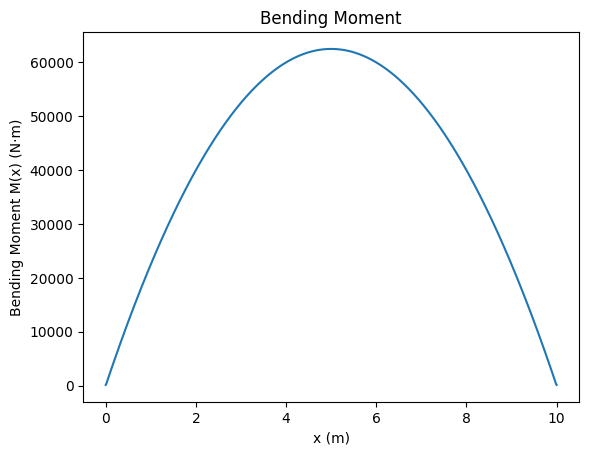

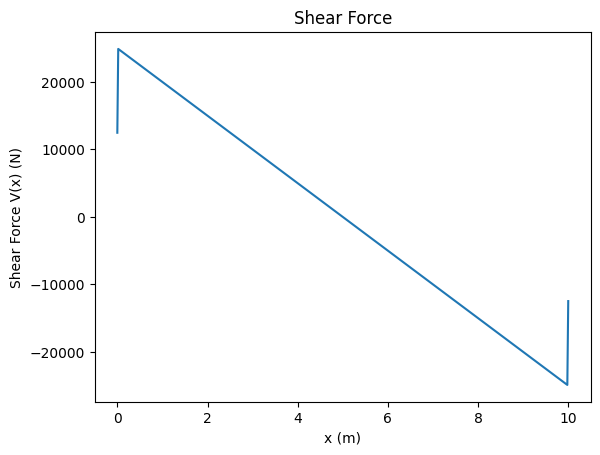

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

# Your code here
w_N = w * 1e3

n_points = 1000
x = np.linspace(0, L, n_points)
y = (w_N * x / (24 * E * I)) * (L**3 - 2 * L * x**2 + x**3)
dy_dx = np.gradient(y, x)          
d2y_dx2 = np.gradient(dy_dx, x)   


M = -E * I * d2y_dx2             
V = np.gradient(M, x)              


plt.figure()
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('Deflection y (m)')
plt.title('Deflection')


plt.figure()
plt.plot(x, M)
plt.xlabel('x (m)')
plt.ylabel('Bending Moment M(x) (N·m)')
plt.title('Bending Moment')


plt.figure()
plt.plot(x, V)
plt.xlabel('x (m)')
plt.ylabel('Shear Force V(x) (N)')
plt.title('Shear Force')

plt.show()


## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

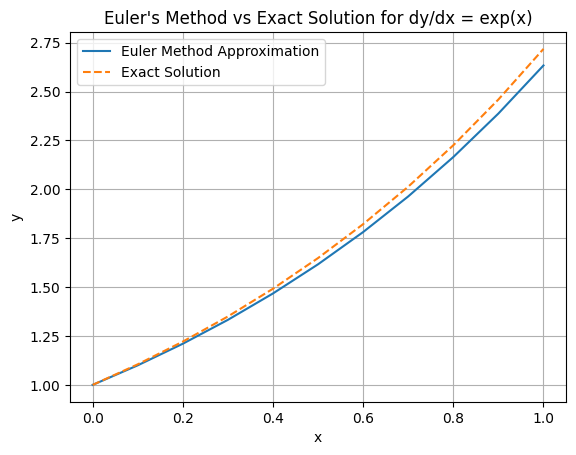

In [13]:
#### Exercise
#Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1
import numpy as np
import matplotlib.pyplot as plt
h = 0.1

num_steps = 10

def f(x, y):
    return np.exp(x)

x0 =0
y= 1
xs = [x0]
ys = [y]

for n in range(num_steps):
    y = y + h * f(x0, y)
    x0 = x0 + h
    xs.append(x0)
    ys.append(y)    

plt.plot(xs, ys, label='Euler Method Approximation')
plt.plot(xs, np.exp(xs), label='Exact Solution', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Euler's Method vs Exact Solution for dy/dx = exp(x)")
plt.legend()
plt.grid()



#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

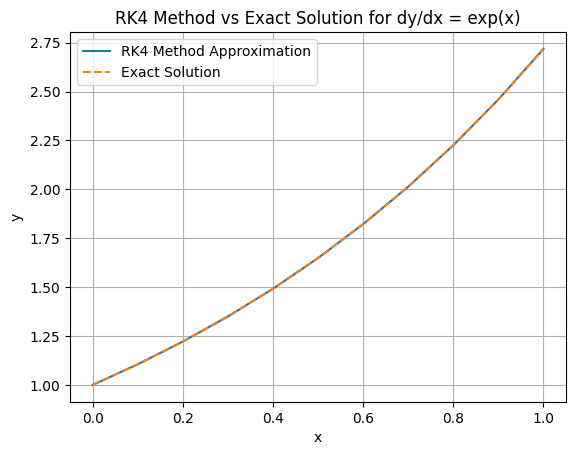

In [15]:
#### Exercise
#Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1
import numpy as np
import matplotlib.pyplot as plt
h = 0.1

num_steps = 10

def f(x, y):
    return np.exp(x)

x0 =0
y= 1
xs = [x0]
ys = [y]
for n in range(num_steps):
    k1 = h * f(x0, y)
    k2 = h * f(x0 + h/2, y + k1/2)
    k3 = h * f(x0 + h/2, y + k2/2)
    k4 = h * f(x0 + h, y + k3)
    
    y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    x0 = x0 + h
    xs.append(x0)
    ys.append(y)
plt.plot(xs, ys, label='RK4 Method Approximation')
plt.plot(xs, np.exp(xs), label='Exact Solution', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title("RK4 Method vs Exact Solution for dy/dx = exp(x)")
plt.legend()
plt.grid()

